## Prediction of Survived people

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


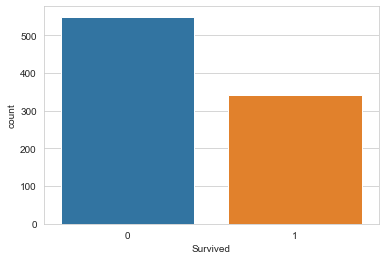

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

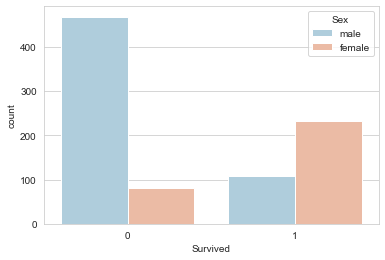

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

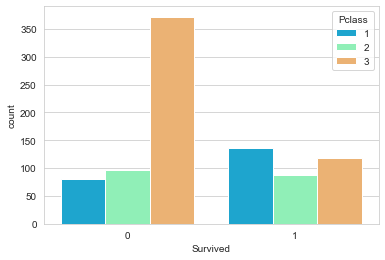

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
## or we can see it through a heat map

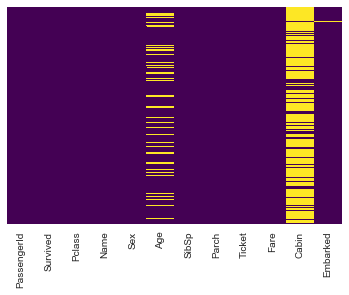

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df['Age'].fillna(df.Age.median(),inplace=True) ### filling nan values with median 

In [11]:
df.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

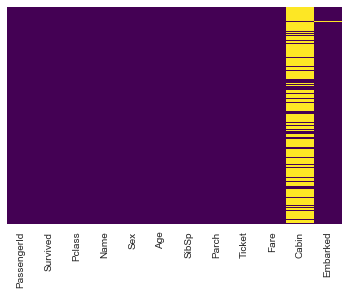

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  
### here you can delete the entire cabin or perform different feature scaling 

In [13]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [14]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [15]:
df['Embarked'].isnull().sum()

2

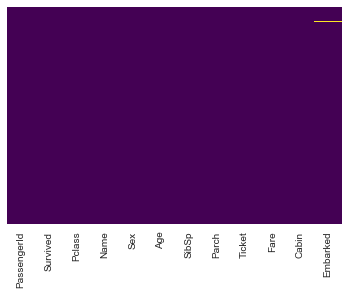

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df.dropna(inplace=True)

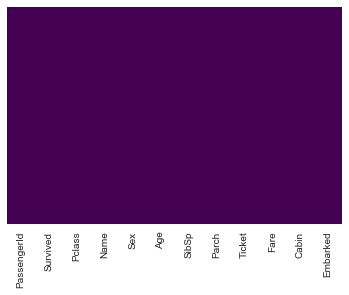

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [21]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [22]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
pd.get_dummies(df['Cabin'],drop_first=True).head()

,B,C,D,E,F,G,M,T
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [25]:
pd.get_dummies(df['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
Cabin = pd.get_dummies(df['Cabin'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [28]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [29]:
df = pd.concat([df,sex,embark,Cabin],axis=1)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,B,C,D,E,F,G,M,T
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,1,0


In [31]:
import scipy.stats as stat
import pylab 

In [32]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    
    

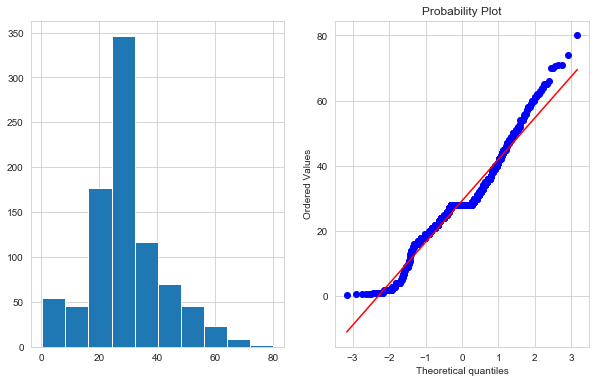

In [33]:
plot_data(df,'Age') ##Gausian distrubution

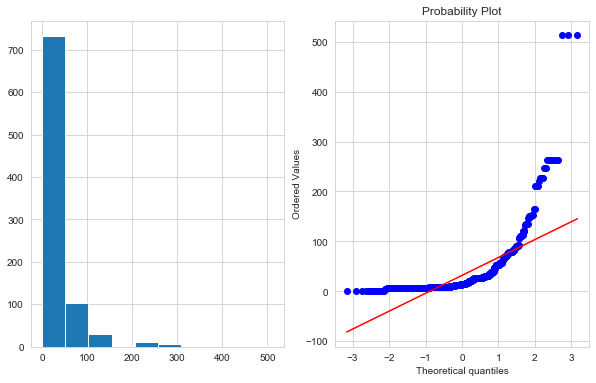

In [34]:
plot_data(df,'Fare')

# Log Transformation
# BoxCox Transformation
### As it is left skewed we can use


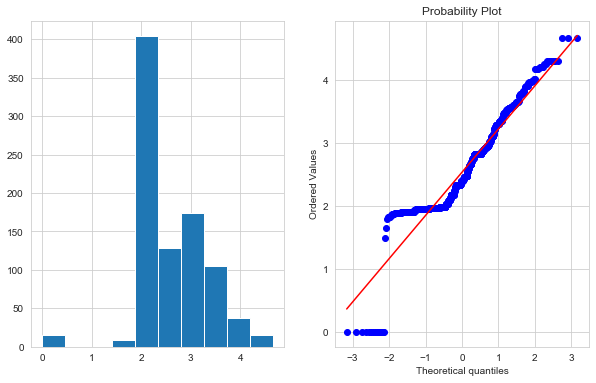

In [35]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

## Logistic Regression model

#### train test split

In [36]:
df.drop('Survived',axis=1).head()  
## survived is independent feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,B,C,D,E,F,G,M,T,Fare_Boxcox
0,1,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,1,0,1.905198
1,2,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,3.492168
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,1,0,1.968824
3,4,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0,3.299415
4,5,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,1,0,1.980026


In [38]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\rigved\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy=confusion_matrix(y_test,predictions)

In [48]:
accuracy

array([[146,  17],
       [ 32,  72]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       163
           1       0.81      0.69      0.75       104

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

